<a href="https://colab.research.google.com/github/LucasBezerraSantos/Projetos_BlueEdtech/blob/BlueEdtech/Gr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercícios de Visualização | Dados do Titanic
----
Lucas Bezerra Santos - Ciência de Dados

## Matplotlib

### Leitura de dados

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/sample_data/train.csv')

In [ ]:
data.columns = ['id passageiro', 'sobrevivente', 'classe', 'nome', 'genero', 'idade', 'irmãoConjunge',
       'PaiseFilhos', 'bilhete', 'tarifa', 'cabine', 'embarque']

In [ ]:
data['genero'].replace({'male': 'homem', 'female': 'mulher'}, inplace=True)

In [ ]:
data['cabine'] = data['cabine'].apply(lambda x: x[0] if pd.notna(x) else np.nan)

### Gráficos

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

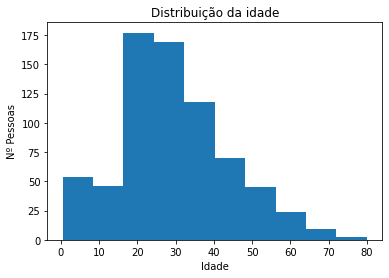

In [ ]:
plt.hist(data['idade']) #histograma
plt.title('Distribuição da idade')
plt.ylabel('Nº Pessoas')
plt.xlabel('Idade')
plt.show()

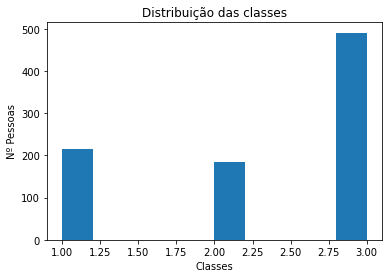

In [ ]:
plt.hist(data['classe']) #histograma
plt.title('Distribuição das classes')
plt.ylabel('Nº Pessoas')
plt.xlabel('Classes')
plt.show()

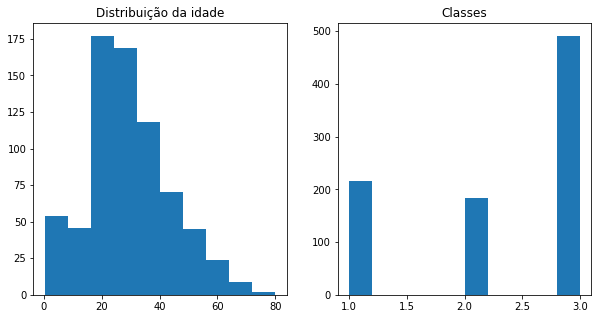

In [ ]:
#subplot

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1) #linha, coluna, nº do plot
plt.hist(data['idade']) 
plt.title('Distribuição da idade')

plt.subplot(1, 2, 2) #linha, coluna, nº do plot
plt.hist(data['classe'])
plt.title('Classes')
plt.tight_layout #ajusta a distancia para as informações não se sobreporem
plt.show()

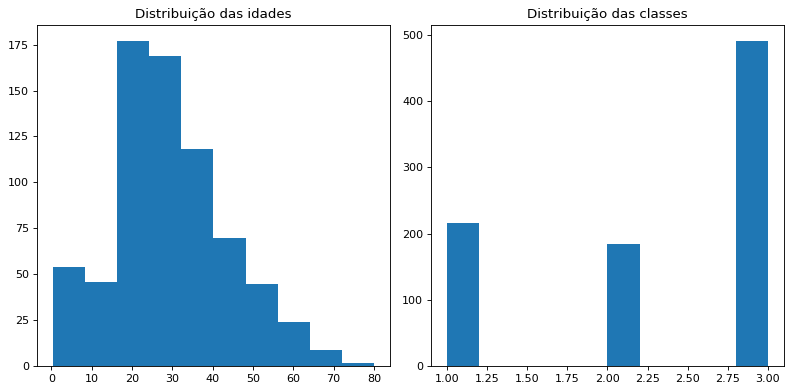

In [ ]:
# Regulando tamanho e qualidade de subplot

f, ax = plt.subplots( 1, 2, figsize=(10, 5), dpi=80 ) 
ax[0].hist( data[ 'idade' ].dropna()) 
ax[0].set_title('Distribuição das idades')

ax[1].hist( data[ 'classe' ]) 
ax[1].set_title('Distribuição das classes')

plt.tight_layout()
plt.show()

## SEABORN

### Gráficos

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


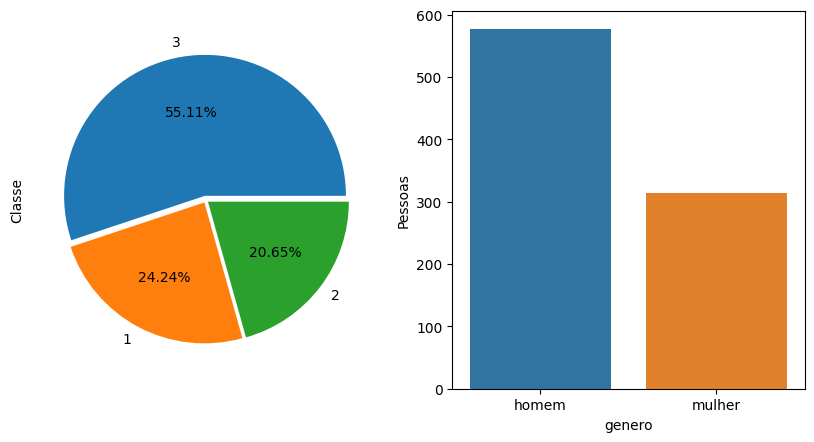

In [ ]:
f, ax = plt.subplots( 1, 2, figsize=( 10, 5 ), dpi= 100 )
data['classe'].value_counts().plot.pie( ax= ax[0], explode=[ 0.03, 0.02, 0.02 ], autopct='%0.2f%%' ) #dois pontos flutuantes na %
sns.countplot( 'genero', data=data, ax=ax[1] ) #coluna, de onde vem, e o eixo. 
ax[0].set_ylabel( 'Classe' )
ax[1].set_ylabel( 'Pessoas' )
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


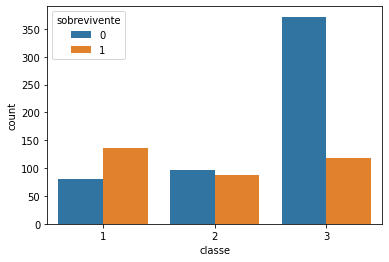

In [ ]:
#countplot e hue

sns.countplot('classe', hue='sobrevivente', data= data) #hue uma separação por classe com legenda
plt.show()

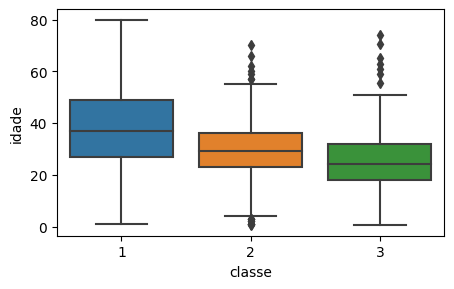

In [ ]:
#boxplot | ideal para análisar a distribuição, média, mediana, concentração dos dados e outliers. 

plt.figure(figsize=(5,3), dpi= 100)
sns.boxplot(x='classe', y='idade', data= data)

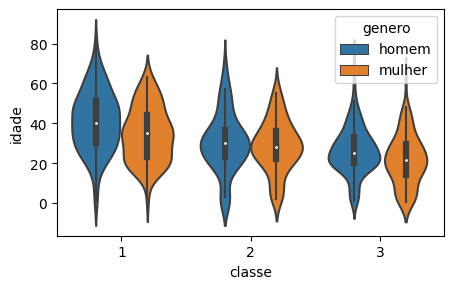

In [ ]:
#violinplot

plt.figure(figsize=(5,3), dpi= 100)
sns.violinplot(x='classe', y='idade', hue='genero', data= data)

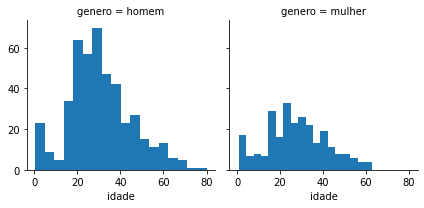

In [ ]:
#facetgrid com hist

g = sns.FacetGrid(data, col= 'genero') 
g.map(plt.hist, 'idade', bins=18) 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<bound method Figure.set_size_inches of <Figure size 432x648 with 6 Axes>>

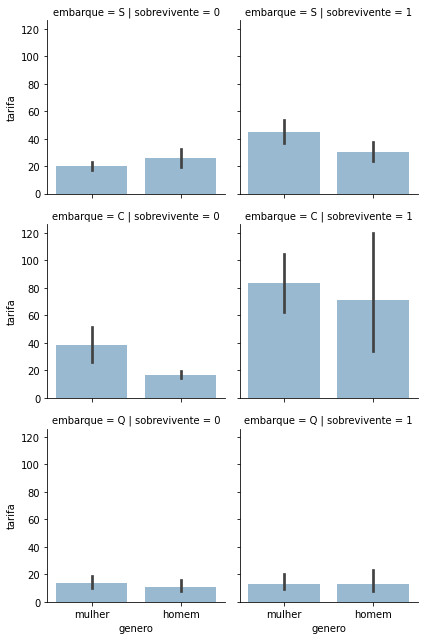

In [ ]:
#facetgrid com barplot

g = sns.FacetGrid(data, row= 'embarque', col= 'sobrevivente')
g.map(sns.barplot, 'genero', 'tarifa', alpha= 0.5)

#para comprimir o tamanho - não obrigatório
fig=plt.gcf()
fig.set_size_inches

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

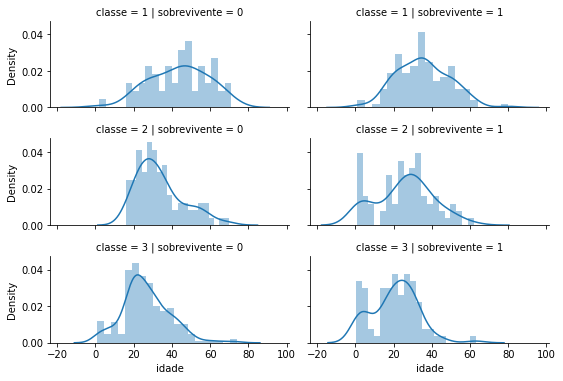

In [ ]:
g = sns.FacetGrid( data, col= 'sobrevivente', row= 'classe', height=1.8, aspect=2.2 ) #height é cumprimento, aspect largura      
g.map( sns.distplot, 'idade', bins=20 ) #distplot recebe apenas um valor
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


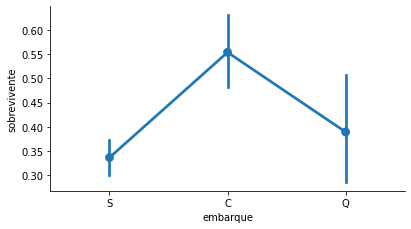

In [ ]:
#catplot do tipo Point

sns.catplot( 'embarque', 'sobrevivente', data= data, kind='point' )

fig = plt.gcf()
fig.set_size_inches( 6, 3 ) 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


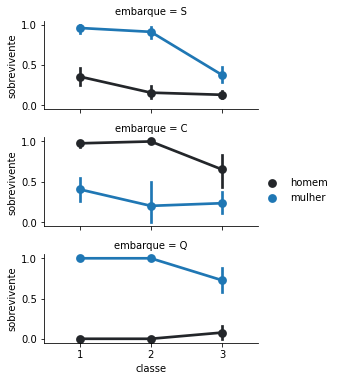

In [ ]:
#FacetGrid Pointplot

g = sns.FacetGrid( data, row= 'embarque', height= 1.8, aspect= 2.2 )
g.map( sns.pointplot, 'classe', 'sobrevivente', 'genero' )
g.add_legend()

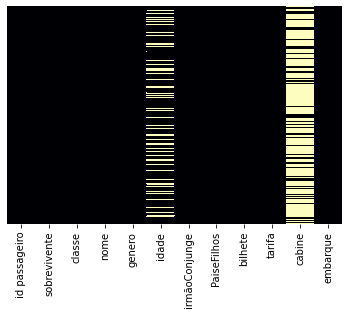

In [ ]:
#heatmap

sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='magma')

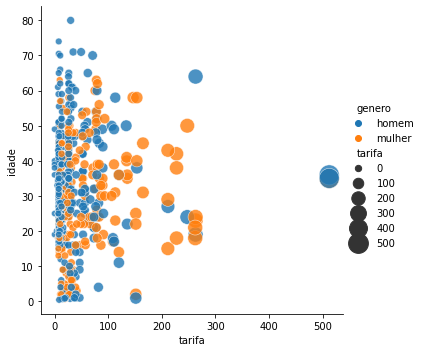

In [ ]:
#relplot

sns.relplot(x= 'tarifa', y= 'idade', hue= 'genero', data= data, size='tarifa', sizes=( 40, 400 ),
alpha= 0.8)
plt.show()

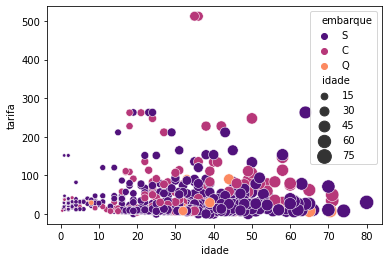

In [ ]:
#scatterplot

sns.scatterplot( x='idade', y= 'tarifa', hue= 'embarque', size= 'idade', 
                palette='magma', data= data, sizes=(10, 200))

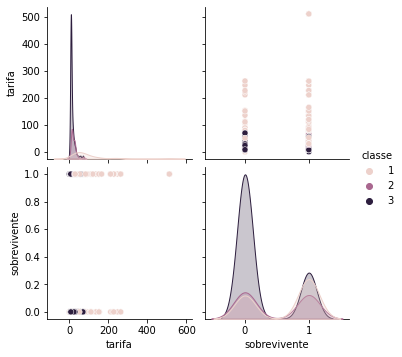

In [ ]:
#pairplot

sns.pairplot(data[['tarifa', 'sobrevivente', 'classe', 'genero']], hue= 'classe' ) 
# o gráfico le apenas variáveis numéricas, no hue é possível classificar por classes strings

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


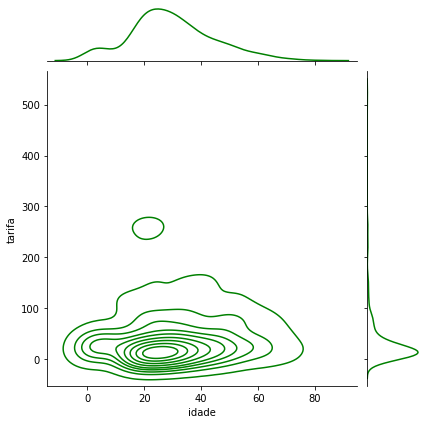

In [ ]:
#jointplot

sns.jointplot( 'idade', 'tarifa', data= data, kind='kde', color='g') 
# kind='kde' é a forma, color='g' é green/verde

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


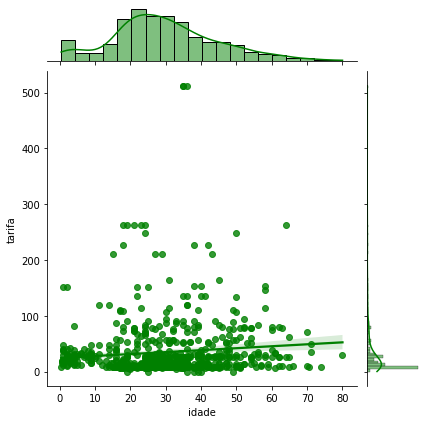

In [ ]:
#reg

sns.jointplot( 'idade', 'tarifa', data= data, kind='reg', color='g')

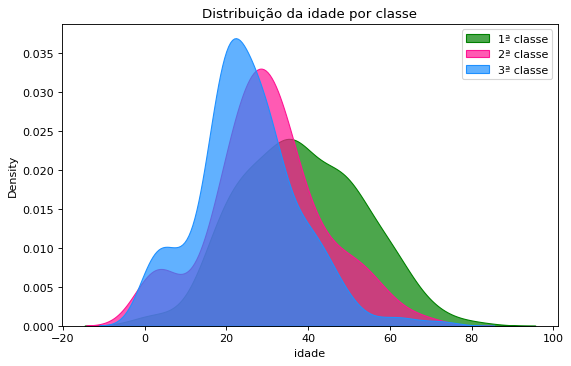

In [ ]:
#kdeplot
plt.figure( figsize=( 8,5 ), dpi=80 )

sns.kdeplot( data['idade'].loc[data['classe'] == 1 ], shade=True, color='g', label='1ª classe', alpha=0.7)
sns.kdeplot( data['idade'].loc[data['classe'] == 2 ], shade=True, color='deeppink', label='2ª classe', alpha=0.7)
sns.kdeplot( data['idade'].loc[data['classe'] == 3 ], shade=True, color='dodgerblue', label='3ª classe', alpha=0.7)
plt.title('Distribuição da idade por classe')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


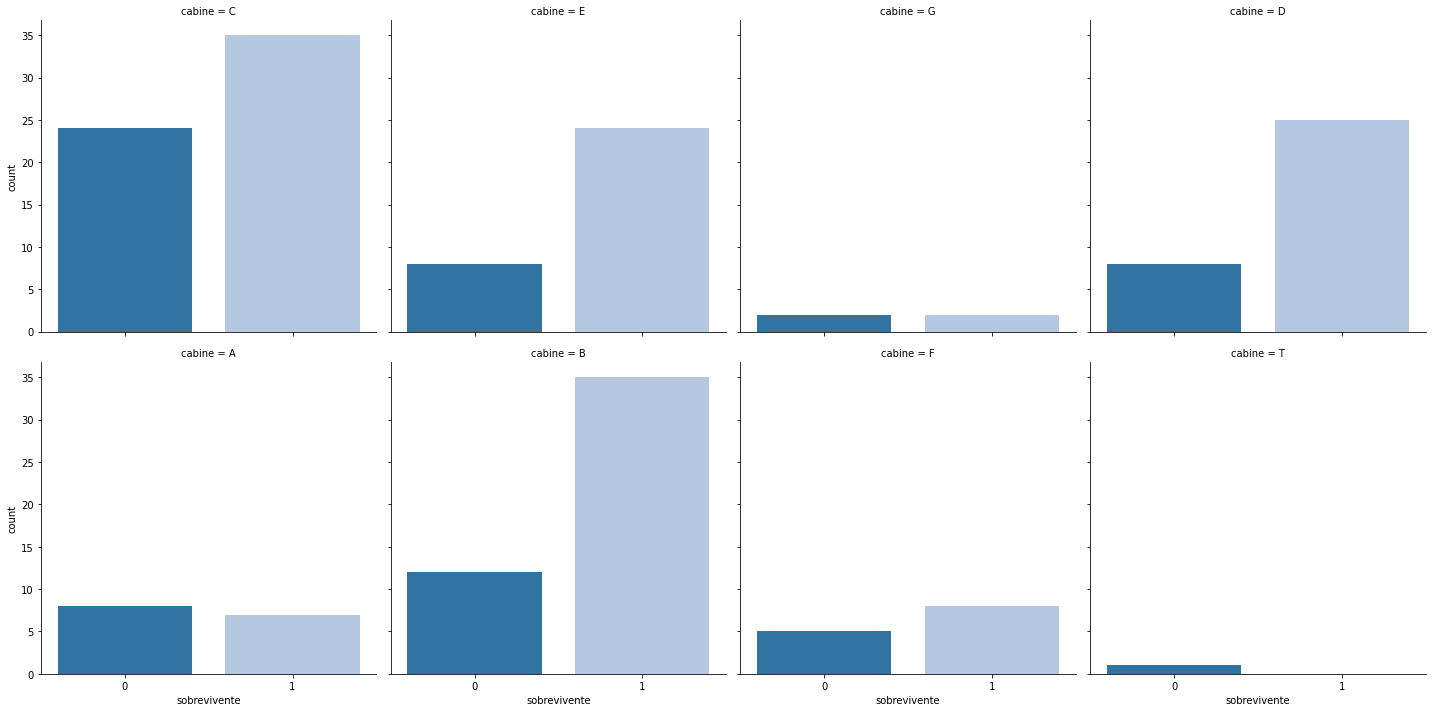

In [ ]:
#catplot do tipo count
sns.catplot( 'sobrevivente', col= 'cabine', data= data[[ 'sobrevivente', 'cabine' ]].dropna(), 
            kind= 'count', col_wrap=4, palette='tab20' )

In [ ]:
data = pd.get_dummies( data= data, columns=['genero'], drop_first=True)

In [ ]:
data.columns = ['id passageiro', 'sobrevivente', 'classe', 'nome', 'idade',
       'irmãoConjunge', 'PaiseFilhos', 'bilhete', 'tarifa', 'cabine',
       'embarque', 'genero']

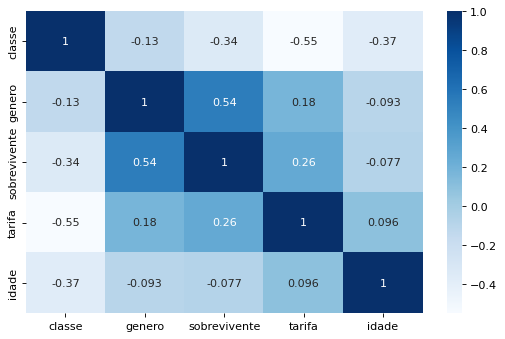

In [ ]:
#heatmap de correlação | aparecem apenas variáveis numéricas. 
plt.figure( figsize=( 8,5 ), dpi=80 )
sns.heatmap( data[['classe', 'genero', 'sobrevivente', 'tarifa', 'idade']].corr(), cmap='Blues', annot=True )
plt.show()

